In [1]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def setdefaults():
  plt.rcParams.update({'font.size': 22})
  plt.rcParams['lines.linewidth'] = 3

In [3]:
setdefaults()

# Example from class on plotting kinematic solutions

![double pendulum](https://lh3.googleusercontent.com/_BXj81KX58ulVhgKCCawnuPmcPqAc_I3uXa0SoUY_AVVES0HxWKx7M6blXF55Ie4gvuOVUA_luOKM5eVfwH0pR6ECkCvNB23iU-ssW3Lw5LKwQtD1eFgpHlL8LTkd0-N8W-iTc73WujkQqJ3CcwJSzs_hZnC56EV9j6w3OP9XyzChcgsVp_enARDr4Btug3NnjrIVlP58KNUDwqVlUlNiXa03FDECoYyu6jkUkiHhCOyYMQ__h78tBbSXB9UcvC0cRGYF0FgnLtXZLxH1nnUaPJ-7aoblaQ0FlV-VONDXMNPnXDYhlGQdqxoQgx3Rfec9YJ_JJfDm6dQ-usKQpUHzCyhQ9vr86MkMolMj6kIZ8IbViVqHIb7rpAFwMUvByD4OJxmsUR-4QI8dSFa-OKlwT71LUTz5XUW6Af5ErPVZGG9wAaDtxnZkx1w7jFR6QxHWklHL6M--l3HBgUM9I2Pp2TzpTdDq_ofnpargsq4IdE6ZZU3Qj9h6GyKmM5IJOIKak4dVMraW_hoKV_F_skkew6GnHOOxXZ9fj9-u13brvsglRCn4sODbDYD187Ih0d5vqy0I_H3RLe_VcZ7hlZrZU-rIJdHA4-WD4IPF6MUSdlm0wIi2cz65gpR0gsrHgl5fFm_dNHJcJ3YrqKpw71181TZrFiLsJbUUFIOBv3XWeloFVtaA4Piyg=w943-h246-no)

In [5]:
t=np.linspace(0,2*pi/50,100); # create time varying from 0-0.126 s (or one period)
x=20*sin(50*t);     # define x in terms of time 
dx=20*50*cos(50*t); # define dx/dt in terms of time (note dx=dx/dt)
t1=0.2*pi*cos(50*t); # define theta1 (t1) 
dt1=-10*pi*sin(50*t); # define dtheta1/dt (dt1)
t2=0.2*pi*sin(50*t-pi/3); # define theta2 (t2) ;
dt2=10*pi*sin(50*t-pi/3); # define dtheta2/dt (dt2);
L1=1;L2=1.5; # set lengths for L1 and L2 (none were given in problem so 1 and 1.5 mm were
             # chosen arbitrarily

Text(0.5, 1.0, 'End velocity')

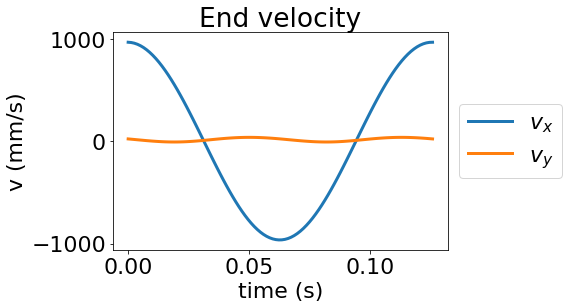

In [6]:
rcc=np.array([x+L1*sin(t1),-L1*cos(t1)]) # position of connection between links
rco=np.array([x+L1*sin(t1)+L2*sin(t2),-(L1*cos(t1)+L2*cos(t2))])    # create a row vectors of
                                                                    # x-component and y-component of
                                                                    # pendulum position C (r_C/O) 
vco=np.array([dx+L1*cos(t1)*dt1+L2*cos(t2)*dt2,
     (L1*sin(t1)*dt1+L2*sin(t2)*dt2)]) # create row
                                       # vectors of
                                       # the x- and
                                       # y-component
                                       # velocity of
                                       # point C

plt.plot(t,vco[0,:],label=r'$v_x$')
plt.plot(t,vco[1,:],label=r'$v_y$')
plt.xlabel('time (s)')
plt.ylabel('v (mm/s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('End velocity')

# Here I create interactive animation for 2-bar linkage

1. Create function that plots the links at timesteps

2. use `interact` to generate the interactive figure

In [8]:
def plot_links(i,rcc,rco,t):
    plt.plot([x[i],rcc[0,i],rco[0,i]],[0,rcc[1,i],rco[1,i]]) # plot lines for 2 links
    plt.plot(rco[0,:],rco[1,:],'--'); # this plots all of the positions in the x-y-plane
                                                #over time
    plt.plot(rco[0,i],rco[1,i],'o');# this plots the position as a circle at
                                            # timestep i
    plt.axis([-30, 30, -3, 0]) # this sets the axis bounds 

In [9]:
interact(lambda i:plot_links(i,rcc,rco,t),i=(0,len(t)-1))

interactive(children=(IntSlider(value=49, description='i', max=99), Output()), _dom_classes=('widget-interact'…

<function __main__.<lambda>(i)>

# Problem 1

![Pendulum on train](https://lh3.googleusercontent.com/v7sDF6RhXCLHFgyWnhFDJUFNSkLJ20PgutwdFPej-UGduDmzdBN20TZGM5DwxRzdVnZKWriulbaPWZ5BIHg-hvnC0Sy2AsT6W7z5tzU393hDxYVuzKvsj27ylU5Mgg9BoA68zp56reuR69qHHyN2p_egAZAeQZSeVaD1g-9xlXkODXt6TRc1RiH6OazH3j34LYoTgyTUUqkKSSZGf58duANe0jfh4qya8qsPymv9KmNEdBCB8pXjoKU4OhYT8682jM2NdPmYZfXPmOP6W4trG8yFHCdj8I04sc8CxQn3aUi3g1I2yLrfMbHM3sQ_E06fZfBRKLJuPabJSGZ6uf_ihVpspuJuWqOAO0p0M_MLfZLrLfjHJoxQo47t_mzzu1QNOV4e8sudRjXj09RdG5bWf9X5D8B4AjwYL-0hsttz7pRy0JyxW8xwSNAVMlyNxPZgN0_lWcwbNhHenwIofnuNqN468mdbi_dAXe_wBJ-rdoCnCBJu1mQR8T11JjDkLXqfWeJ2ie4y2e2bMyPWP6JJUPcSsWdooSMBw6CPB2Q0zvAaQoiMetWI_ucn3o8LmL3cmtvCHP8Qm8tCm0KMLdov4IxqiV_mTAgyjzWxpxXMbu8xHeIh1uuXpd5meJ4cVq4otjVK1wfWw_HewbwnFMWZW7y77EWjdEcck_Liy08bCsVZcWC9rV6LaA=w417-h265-no)

The axis shown in Fig 1-5 has the following constants

$v_x=1$ m/s. 

$m= 1$ kg

$r= 300$ mm

$l_2 = 1000$ mm

$l_1 = 1200$ mm

$s_2 = 10$ mm

$v_y = 0$ m/s

$a_x = 0$ m/s$^2$

**(a)** Plot the angle of the pendulum for one full period of oscillation given $\theta(0)=\pi/12$ and $\dot{\theta}(0)=0$

In [10]:
# insert code here

**(b)** make an animation of the position of the mass, $m$, in terms of $X_1$ and $X_2$ for $t=0-0.5$s

In [11]:
def my_pendulum(n,N):
    '''function to plot position of pendulum at a given index, n,
    out of N total steps between 0 and 0.5 s
    in the global coordinate system X1-Y1 shown in Fig. 1-5
    The path is plotted as a dashed line'''
    N=100
    t=np.linspace(0,0.5,N)
    # your work for X1 and X2 in meters (or change units for plt.axis)
    plt.plot(X1,Y1,'--',label = 'path')
    plt.plot(X1[n],Y1[n],'o',label = 'path')
    plt.axis([0,0.6, 0,1]) # set axis x= 0-0.6 m and y=0-1 m


In [ ]:
# once my_pendulum has position of the mass, m, the interact command below shouldn't need to change
interact(lambda n:my_pendulum(n,N),i=(0,99))

**(c)** Plot the angle $\theta$ for one period of oscillation for 2 conditions, label your two lines on one graph:

1. $a_x=$ 0 m/s$^2$

2. $a_x=$ 5 m/s$^2$

In [12]:
# your work here